In [1]:
from fenics import *
from dolfin import *
import matplotlib.pyplot as plt
import time
import numpy as np

## Create discretized mesh
* mesh is unit square with 10 elements along x and y direction - play around with the number and shape of element("right/left", "crossed")
* marking the right boundary of the mesh with the label value = 1 - this is where the traction will be applied

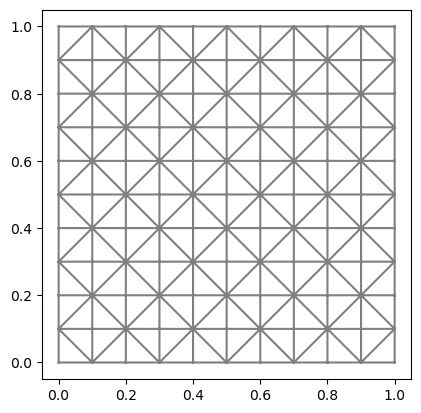

In [2]:
discretization = 10
mesh = UnitSquareMesh(discretization, discretization, "right/left")
plot(mesh)

class Right(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[0], 1.0)
    
# mark right boundary subdomain with marker 1
right = Right()
boundaries = MeshFunction("size_t", mesh, 1)
boundaries.set_all(0)
right.mark(boundaries, 1)
ds = Measure('ds', domain=mesh, subdomain_data=boundaries)

## Setup for displacement field
* create function space for displacement field
* Boundary condition on the displacement field - left boundary clamped

In [3]:
VFS = VectorFunctionSpace(mesh, "P", dim=2, degree=1)

def left_boundary(x, on_boundary):
    return on_boundary and near(x[0], 0.)
bc_left = DirichletBC(VFS, ((0., 0.)), left_boundary)

## Setup for energy formulation
* Define elastic constants
* elastic energy density calculated using neo-hookean model - nonlinear

In [4]:
E = 1.
nu = 0.3
mu = E/(2*(1+nu))
Lambda = E*nu/((1-2*nu)*(1+nu))


def elastic_energy_density(u):
    dim = 2
    A = (grad(u) + Identity(dim))
    #right cauchy-green tensor
    C = A.T*A
    J = det(A)
    #elastic energy density
    psi = (Lambda/2)*(ln(J))**2 + (mu/2)*(tr(C)-dim-2*ln(J))
    return psi

## Posing energy minimization problem
* define the displacement field(unknown) and loads(known)
* write free energy of the system containing
    1. elastic energy - depends on displacement
    2. work - depends on displacement and load
* Gradient of free energy is the residual 

In [5]:
u_init = Function(VFS)
t = Expression(("k", 0.0), k=0., degree=1)
free_energy = elastic_energy_density(u_init)*dx - dot(t, u_init)*ds(1)
residual = derivative(free_energy, u_init)
assemble(free_energy)

0.0

# Constant load increments
* Simulate loading of the system by increasing the magnitude of known load in small steps
* Predicted solution for the next step is the previous converged step

In [6]:
t.k = 0.0
load_increment = 0.01
steps_constant = []
converged_loads_constant = []
while t.k < 10:
    start_time = time.time()
    try:
        solve(residual == 0, u_init, [bc_left])
    except:
        break
    steps_constant.append(time.time() - start_time)
    time.sleep(1e-3)
    converged_loads_constant.append(t.k - load_increment)
    t.k += load_increment
    
final_load = t.k - load_increment

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 0.000e+00 (tol = 1.000e-10) r (rel) = -nan (tol = 1.000e-09)
  Newton solver finished in 0 iterations and 0 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 2.839e-05 (tol = 1.000e-10) r (rel) = 9.211e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 1.765e-09 (tol = 1.000e-10) r (rel) = 5.727e-07 (tol = 1.000e-09)
  Newton iteration 3: r (abs) = 2.568e-16 (tol = 1.000e-10) r (rel) = 8.333e-14 (tol = 1.000e-09)
  Newton solver finished in 3 iterations and 3 linear solver iterations.
No Jacobian form specified for nonlinear variatio

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 2.706e-05 (tol = 1.000e-10) r (rel) = 8.781e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 1.087e-09 (tol = 1.000e-10) r (rel) = 3.525e-07 (tol = 1.000e-09)
  Newton iteration 3: r (abs) = 3.534e-16 (tol = 1.000e-10) r (rel) = 1.147e-13 (tol = 1.000e-09)
  Newton solver finished in 3 iterations and 3 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 2.696e-05 (tol = 1.000e-10) r (rel) = 8.748e-03 (tol = 1.000e-09)
  Newton iteration 

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 2.296e-05 (tol = 1.000e-10) r (rel) = 7.449e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 5.360e-10 (tol = 1.000e-10) r (rel) = 1.739e-07 (tol = 1.000e-09)
  Newton iteration 3: r (abs) = 7.673e-16 (tol = 1.000e-10) r (rel) = 2.490e-13 (tol = 1.000e-09)
  Newton solver finished in 3 iterations and 3 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 2.286e-05 (tol = 1.000e-10) r (rel) = 7.418e-03 (tol = 1.000e-09)
  Newton iteration 

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 1.972e-05 (tol = 1.000e-10) r (rel) = 6.396e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 5.834e-10 (tol = 1.000e-10) r (rel) = 1.893e-07 (tol = 1.000e-09)
  Newton iteration 3: r (abs) = 1.193e-15 (tol = 1.000e-10) r (rel) = 3.871e-13 (tol = 1.000e-09)
  Newton solver finished in 3 iterations and 3 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 1.964e-05 (tol = 1.000e-10) r (rel) = 6.371e-03 (tol = 1.000e-09)
  Newton iteration 

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 1.693e-05 (tol = 1.000e-10) r (rel) = 5.492e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 4.800e-10 (tol = 1.000e-10) r (rel) = 1.557e-07 (tol = 1.000e-09)
  Newton iteration 3: r (abs) = 1.444e-15 (tol = 1.000e-10) r (rel) = 4.684e-13 (tol = 1.000e-09)
  Newton solver finished in 3 iterations and 3 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 1.686e-05 (tol = 1.000e-10) r (rel) = 5.470e-03 (tol = 1.000e-09)
  Newton iteration 

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 1.464e-05 (tol = 1.000e-10) r (rel) = 4.750e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 3.509e-10 (tol = 1.000e-10) r (rel) = 1.139e-07 (tol = 1.000e-09)
  Newton iteration 3: r (abs) = 2.227e-15 (tol = 1.000e-10) r (rel) = 7.224e-13 (tol = 1.000e-09)
  Newton solver finished in 3 iterations and 3 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 1.459e-05 (tol = 1.000e-10) r (rel) = 4.732e-03 (tol = 1.000e-09)
  Newton iteration 

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 1.282e-05 (tol = 1.000e-10) r (rel) = 4.158e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 2.513e-10 (tol = 1.000e-10) r (rel) = 8.155e-08 (tol = 1.000e-09)
  Newton iteration 3: r (abs) = 2.469e-15 (tol = 1.000e-10) r (rel) = 8.012e-13 (tol = 1.000e-09)
  Newton solver finished in 3 iterations and 3 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 1.277e-05 (tol = 1.000e-10) r (rel) = 4.144e-03 (tol = 1.000e-09)
  Newton iteration 

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 1.136e-05 (tol = 1.000e-10) r (rel) = 3.685e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 1.818e-10 (tol = 1.000e-10) r (rel) = 5.899e-08 (tol = 1.000e-09)
  Newton iteration 3: r (abs) = 3.801e-15 (tol = 1.000e-10) r (rel) = 1.233e-12 (tol = 1.000e-09)
  Newton solver finished in 3 iterations and 3 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 1.132e-05 (tol = 1.000e-10) r (rel) = 3.673e-03 (tol = 1.000e-09)
  Newton iteration 

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 1.023e-05 (tol = 1.000e-10) r (rel) = 3.318e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 1.361e-10 (tol = 1.000e-10) r (rel) = 4.415e-08 (tol = 1.000e-09)
  Newton iteration 3: r (abs) = 4.366e-15 (tol = 1.000e-10) r (rel) = 1.417e-12 (tol = 1.000e-09)
  Newton solver finished in 3 iterations and 3 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 1.020e-05 (tol = 1.000e-10) r (rel) = 3.309e-03 (tol = 1.000e-09)
  Newton iteration 

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 9.241e-06 (tol = 1.000e-10) r (rel) = 2.998e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 1.022e-10 (tol = 1.000e-10) r (rel) = 3.315e-08 (tol = 1.000e-09)
  Newton iteration 3: r (abs) = 4.407e-15 (tol = 1.000e-10) r (rel) = 1.430e-12 (tol = 1.000e-09)
  Newton solver finished in 3 iterations and 3 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 9.218e-06 (tol = 1.000e-10) r (rel) = 2.991e-03 (tol = 1.000e-09)
  Newton iteration 

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 8.301e-06 (tol = 1.000e-10) r (rel) = 2.693e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 7.510e-11 (tol = 1.000e-10) r (rel) = 2.437e-08 (tol = 1.000e-09)
  Newton solver finished in 2 iterations and 2 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 8.282e-06 (tol = 1.000e-10) r (rel) = 2.687e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 7.460e-11 (tol = 1.000e-10) r (rel) = 2.420e-08 (tol = 1.000e-09)
  Newton solver fin

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 7.516e-06 (tol = 1.000e-10) r (rel) = 2.439e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 5.608e-11 (tol = 1.000e-10) r (rel) = 1.819e-08 (tol = 1.000e-09)
  Newton solver finished in 2 iterations and 2 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 7.501e-06 (tol = 1.000e-10) r (rel) = 2.433e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 5.573e-11 (tol = 1.000e-10) r (rel) = 1.808e-08 (tol = 1.000e-09)
  Newton solver fin

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 6.881e-06 (tol = 1.000e-10) r (rel) = 2.233e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 4.332e-11 (tol = 1.000e-10) r (rel) = 1.406e-08 (tol = 1.000e-09)
  Newton solver finished in 2 iterations and 2 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 6.868e-06 (tol = 1.000e-10) r (rel) = 2.228e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 4.309e-11 (tol = 1.000e-10) r (rel) = 1.398e-08 (tol = 1.000e-09)
  Newton solver fin

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 6.305e-06 (tol = 1.000e-10) r (rel) = 2.046e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 3.377e-11 (tol = 1.000e-10) r (rel) = 1.096e-08 (tol = 1.000e-09)
  Newton solver finished in 2 iterations and 2 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 6.293e-06 (tol = 1.000e-10) r (rel) = 2.042e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 3.360e-11 (tol = 1.000e-10) r (rel) = 1.090e-08 (tol = 1.000e-09)
  Newton solver fin

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 5.835e-06 (tol = 1.000e-10) r (rel) = 1.893e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 3.080e-11 (tol = 1.000e-10) r (rel) = 9.992e-09 (tol = 1.000e-09)
  Newton solver finished in 2 iterations and 2 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 5.826e-06 (tol = 1.000e-10) r (rel) = 1.890e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 3.101e-11 (tol = 1.000e-10) r (rel) = 1.006e-08 (tol = 1.000e-09)
  Newton solver fin

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 5.471e-06 (tol = 1.000e-10) r (rel) = 1.775e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 3.898e-11 (tol = 1.000e-10) r (rel) = 1.265e-08 (tol = 1.000e-09)
  Newton solver finished in 2 iterations and 2 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 5.464e-06 (tol = 1.000e-10) r (rel) = 1.773e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 3.898e-11 (tol = 1.000e-10) r (rel) = 1.265e-08 (tol = 1.000e-09)
  Newton solver fin

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 5.147e-06 (tol = 1.000e-10) r (rel) = 1.670e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 3.355e-11 (tol = 1.000e-10) r (rel) = 1.089e-08 (tol = 1.000e-09)
  Newton solver finished in 2 iterations and 2 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 5.140e-06 (tol = 1.000e-10) r (rel) = 1.668e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 3.337e-11 (tol = 1.000e-10) r (rel) = 1.083e-08 (tol = 1.000e-09)
  Newton solver fin

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 4.850e-06 (tol = 1.000e-10) r (rel) = 1.573e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 2.575e-11 (tol = 1.000e-10) r (rel) = 8.353e-09 (tol = 1.000e-09)
  Newton solver finished in 2 iterations and 2 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 4.843e-06 (tol = 1.000e-10) r (rel) = 1.571e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 2.559e-11 (tol = 1.000e-10) r (rel) = 8.302e-09 (tol = 1.000e-09)
  Newton solver fin

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 4.579e-06 (tol = 1.000e-10) r (rel) = 1.486e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 1.972e-11 (tol = 1.000e-10) r (rel) = 6.398e-09 (tol = 1.000e-09)
  Newton solver finished in 2 iterations and 2 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 4.574e-06 (tol = 1.000e-10) r (rel) = 1.484e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 1.960e-11 (tol = 1.000e-10) r (rel) = 6.361e-09 (tol = 1.000e-09)
  Newton solver fin

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 4.335e-06 (tol = 1.000e-10) r (rel) = 1.407e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 1.546e-11 (tol = 1.000e-10) r (rel) = 5.015e-09 (tol = 1.000e-09)
  Newton solver finished in 2 iterations and 2 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 4.330e-06 (tol = 1.000e-10) r (rel) = 1.405e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 1.538e-11 (tol = 1.000e-10) r (rel) = 4.989e-09 (tol = 1.000e-09)
  Newton solver fin

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 4.114e-06 (tol = 1.000e-10) r (rel) = 1.335e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 1.242e-11 (tol = 1.000e-10) r (rel) = 4.028e-09 (tol = 1.000e-09)
  Newton solver finished in 2 iterations and 2 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 4.109e-06 (tol = 1.000e-10) r (rel) = 1.333e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 1.236e-11 (tol = 1.000e-10) r (rel) = 4.010e-09 (tol = 1.000e-09)
  Newton solver fin

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 3.914e-06 (tol = 1.000e-10) r (rel) = 1.270e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 1.019e-11 (tol = 1.000e-10) r (rel) = 3.305e-09 (tol = 1.000e-09)
  Newton solver finished in 2 iterations and 2 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 3.909e-06 (tol = 1.000e-10) r (rel) = 1.268e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 1.014e-11 (tol = 1.000e-10) r (rel) = 3.291e-09 (tol = 1.000e-09)
  Newton solver fin

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 3.731e-06 (tol = 1.000e-10) r (rel) = 1.210e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 8.500e-12 (tol = 1.000e-10) r (rel) = 2.758e-09 (tol = 1.000e-09)
  Newton solver finished in 2 iterations and 2 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 3.727e-06 (tol = 1.000e-10) r (rel) = 1.209e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 8.469e-12 (tol = 1.000e-10) r (rel) = 2.748e-09 (tol = 1.000e-09)
  Newton solver fin

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 3.571e-06 (tol = 1.000e-10) r (rel) = 1.159e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 7.249e-12 (tol = 1.000e-10) r (rel) = 2.352e-09 (tol = 1.000e-09)
  Newton solver finished in 2 iterations and 2 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 3.568e-06 (tol = 1.000e-10) r (rel) = 1.157e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 7.221e-12 (tol = 1.000e-10) r (rel) = 2.343e-09 (tol = 1.000e-09)
  Newton solver fin

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 3.434e-06 (tol = 1.000e-10) r (rel) = 1.114e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 6.310e-12 (tol = 1.000e-10) r (rel) = 2.047e-09 (tol = 1.000e-09)
  Newton solver finished in 2 iterations and 2 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.082e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 3.431e-06 (tol = 1.000e-10) r (rel) = 1.113e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 6.290e-12 (tol = 1.000e-10) r (rel) = 2.041e-09 (tol = 1.000e-09)
  Newton solver fin

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


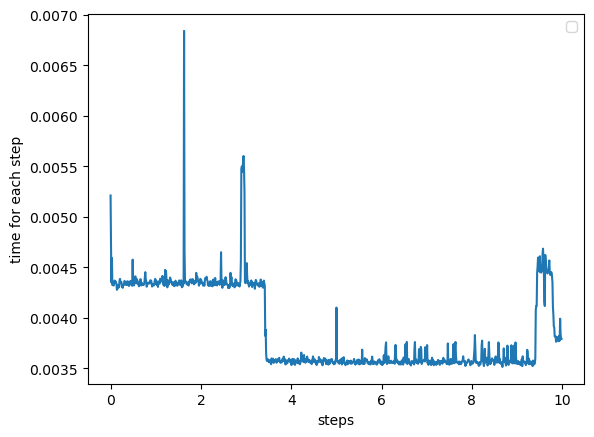

In [7]:
plt.plot(converged_loads_constant, steps_constant)
plt.xlabel('steps')
plt.ylabel('time for each step')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


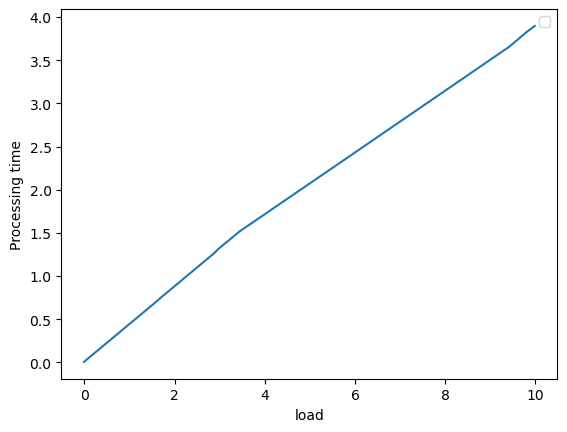

In [8]:
def Cumulative(lists):
    cu_list = []
    length = len(lists)
    cu_list = [sum(lists[0:x:1]) for x in range(0, length+1)]
    return cu_list[1:]

plt.plot(converged_loads_constant, Cumulative(steps_constant))
plt.xlabel('load')
plt.ylabel('Processing time')
plt.legend()